---

# Quintessence + Yukawa interaction (bounded vars)

$$u\equiv \frac{r\phi}{1\pm r\phi}$$

---

---
**Author**:      Efrain Torres-Lomas 

**Email**:       ``efrain@fisica.ugto.mx``, ``efraazul@gmail.com``

**Github**:      https://github.com/elchinot7

**Bitbucket**:   https://bitbucket.org/elchinot7/cosmo_dyn_sys

**Date**:        Oct 2016

---

## Note:
#### Here I will use the ``dynsyscosmopy`` Python package.

You can get it by doing:

    git clone https://elchinot7@bitbucket.org/elchinot7/pyncare.git
    

## Importing ``Pyncare`` and other packages 

In [1]:
from pyncare.utils import plot_latitude
from pyncare import BaseDynSys
from pyncare.models import dyn_sys_exp_yukawa_bounded
from pyncare.constraints import plot_circle, plot_circle_2D, plot_cylinder

from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict

import inspect
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook

## Seaborne is a package to tweak the matplotlib's plots 

In [2]:
import seaborn as sns
sns.set()
sns.set_context("notebook") # paper, notebook, talk, and poster

<IPython.core.display.Javascript object>


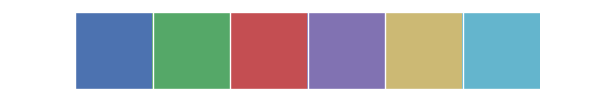

In [3]:
current_palette = sns.color_palette("deep") # deep, muted, pastel, bright, dark, and colorblind
sns.palplot(current_palette)

## This is the physical dynamical system

### Name: 
``pyncare.models.dyn_sys_exp_yukawa_bounded``

$$x'  =  \frac{\sqrt{6}}{2}r f\left(\phi \right)\left(1-x^{2}-y^{2}\right) - 3x + \frac{\sqrt{6}}{2}\lambda y^2 + \frac{3}{2} x \left[(1+ w_{m}) (1-y^{2})+x^{2}( 1 - w_{m} )\right]$$

$$ y'  =  - \frac{\sqrt{6}}{2}\lambda x y + \frac{3}{2} y \left[(1 + w_{m}) (1-y^{2}) + x^{2}(1-w_{m})\right]$$
$$ u' =  \sqrt{6} r  \left( 1 \mp u \right)^2 x$$

In [4]:
print inspect.getsource(dyn_sys_exp_yukawa_bounded)

def dyn_sys_exp_yukawa_bounded(init, t=None, model_pars=[3.0, 0.0]):
    """Quintessence + Yukawa interaction (bounded vars)"""
    lambda1 = model_pars[0]
    r = model_pars[1]

    x = init[0]
    y = init[1]
    u = init[2]

    w_m = 0.0

    if u > 0.0:
        g = (1.0 - u)
        f = r * g / (1.0 - 2.0*u)
    else:
        g = (1.0 + u)
        f = r * g

    A = (1.0 - w_m) * x**2.0 + (1.0 + w_m)*(1.0 - y**2.0)
    Q = np.sqrt(6.0) * f * (1.0 - x**2.0 - y**2.0) / 2.0

    x_dot = Q - 3.0 * x + lambda1 * np.sqrt(6.0) * y**2.0 / 2.0 + 1.5 * x * A
    y_dot = -lambda1 * np.sqrt(6.0) * x * y / 2.0 + 1.5 * y * A
    u_dot = np.sqrt(6.0) * r * g**2.0 * x

    return [x_dot, y_dot, u_dot]



### Plot style parameters

Colors & Line Styles

In [5]:
#lines = ["-", "--"]
lines = ["-"]
line_width = 1.0


# Numerical analysis:

- Define the Dynamical System Object
- Solve & Plot the solutions
- Add the constraints plots

**New!** Now is ease to use different predefined color schemes!

Just set

    colors='colorscheme'

where 'colorscheme' is one of 

    [None, 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']


<IPython.core.display.Javascript object>


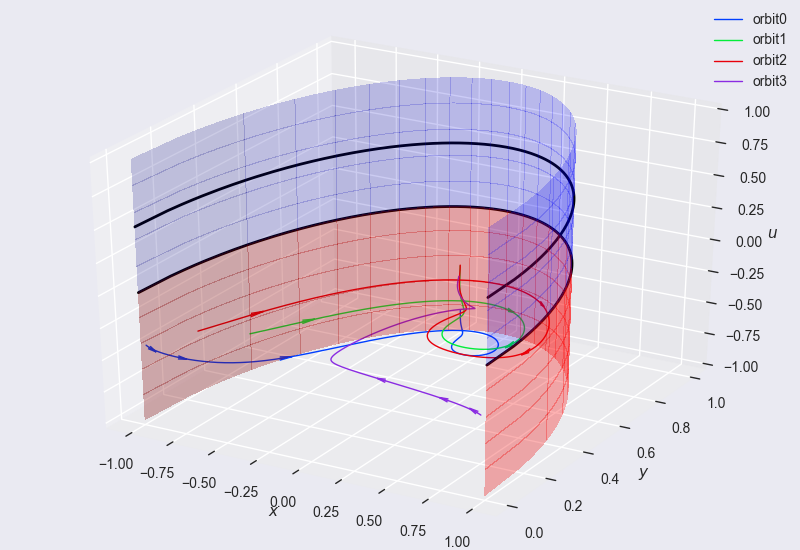

In [6]:
# lambda1 = np.sqrt(4)
# lambda1 = np.sqrt(3)
lambda1= 3.0
r = 0.10
model_pars=[lambda1, r]

var_names = {'x': r'$x$', 'y': r'$y$', 'z': r'$u$'}

t = np.linspace(0.0, 10.0, 7000)
#t = np.linspace(0.0, 100.0, 2000)
projected_planes = ['xy']
line_width = 1.0

u0 = -0.4 

arrow_pos = [100, 500, 1000]

orbits = [{'vars': OrderedDict([('x', -0.97), ('y', 0.0001), ('z', u0)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'orbit0'},
          {'vars': OrderedDict([('x', -0.6), ('y', 0.2), ('z', u0)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'orbit1'},
          {'vars': OrderedDict([('x', -0.85), ('y', 0.15), ('z', u0)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'orbit2'},
          {'vars': OrderedDict([('x', 0.96), ('y', 0.01), ('z', u0)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'orbit3'},
          ]
dynsys = BaseDynSys(model=dyn_sys_exp_yukawa_bounded,
                    model_pars= model_pars,
                    var_names=var_names,
                    Ndim=3,
                    orbits=orbits,
                    #colors='black',
                    #colors='dark'
                    colors='bright'
                    )
# we can redefine the modelpars if necessary
#dynsys.model_pars = [lambda1, r]
fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.add_subplot(111)
dynsys.plot_orbits(ax=ax, vars_to_plot=['x', 'y', 'z'], add_flow=True, lw=1)

constraint_color1 = 'r'
constraint_color2 = 'b'

constraint_tranparency1 = 0.3
constraint_tranparency2 = 0.2

plot_circle(ax, color='k')
plot_circle(ax, z=.5, color='k')
plot_cylinder(ax, z_min=-1.0, z_max=0.0, color=constraint_color1,
              alpha=constraint_tranparency1)
plot_cylinder(ax, z_min=0.0, z_max=1.0, color=constraint_color2,
              alpha=constraint_tranparency2)
#plot_circle_2D(ax_project_2D, color='k--', line_width=1.0)   

<IPython.core.display.Javascript object>


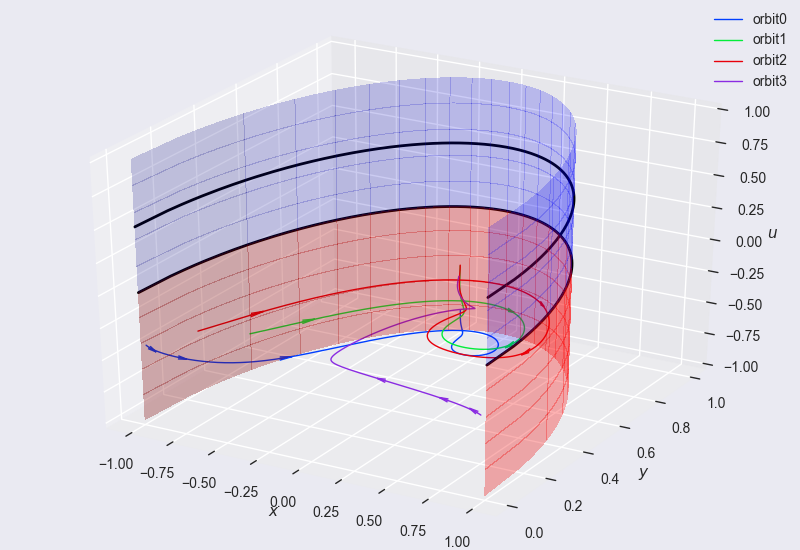

In [10]:
# lambda1 = np.sqrt(4)
# lambda1 = np.sqrt(3)
lambda1= 3.0
r = 0.10
model_pars=[lambda1, r]

var_names = {'x': r'$x$', 'y': r'$y$', 'z': r'$u$'}

t = np.linspace(0.0, 10.0, 7000)
#t = np.linspace(0.0, 100.0, 2000)
projected_planes = ['xy']
line_width = 1.0

u0 = -0.4 

arrow_pos = [100, 500, 1000]

orbits = [{'vars': OrderedDict([('x', -0.97), ('y', 0.0001), ('z', u0)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'orbit0'},
          {'vars': OrderedDict([('x', -0.6), ('y', 0.2), ('z', u0)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'orbit1'},
          {'vars': OrderedDict([('x', -0.85), ('y', 0.15), ('z', u0)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'orbit2'},
          {'vars': OrderedDict([('x', 0.96), ('y', 0.01), ('z', u0)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'orbit3'},
          ]
dynsys = BaseDynSys(model=dyn_sys_exp_yukawa_bounded,
                    model_pars= model_pars,
                    var_names=var_names,
                    Ndim=3,
                    orbits=orbits,
                    #colors='black',
                    #colors='dark'
                    colors='bright'
                    )
# we can redefine the modelpars if necessary
#dynsys.model_pars = [lambda1, r]
fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.add_subplot(111)
dynsys.plot_orbits(ax=ax, vars_to_plot=['x', 'y', 'z'], add_flow=True, lw=1)

plot_circle(ax, color='k')
plot_circle(ax, z=.5, color='k')
plot_cylinder(ax, z_min=-1.0, z_max=0.0, color='r',
              alpha=0.3)
plot_cylinder(ax, z_min=0.0, z_max=1.0, color='b',
              alpha=0.2)
#plot_circle_2D(ax_project_2D, color='k--', line_width=1.0)   

#  Call the Triangle Plotter defined in Pyncare

## Note: How to edit the subplots inside triangle? SEE BELLOW !

<IPython.core.display.Javascript object>


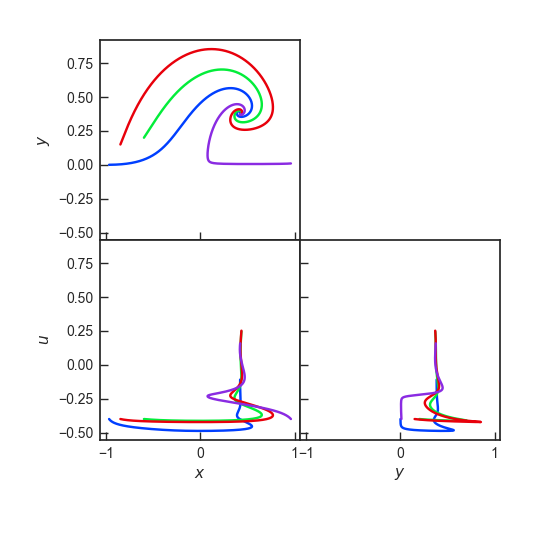

In [8]:
with sns.axes_style("ticks"):
    tri = dynsys.triangle()

# The triangle can be edited as shown bellow:

In [11]:
M = len(vars_to_plot) - 1
factor = 2.0           # size of one side of one panel
lbdim = 0.5 * factor   # size of left/bottom margin
trdim = 0.2 * factor   # size of top/right margin
wspace = 0.3         # w/hspace size
hspace = 0.3         # w/hspace size
plotdim = factor * M + factor * (M - 1.) * wspace
dim = lbdim + plotdim + trdim

<IPython.core.display.Javascript object>


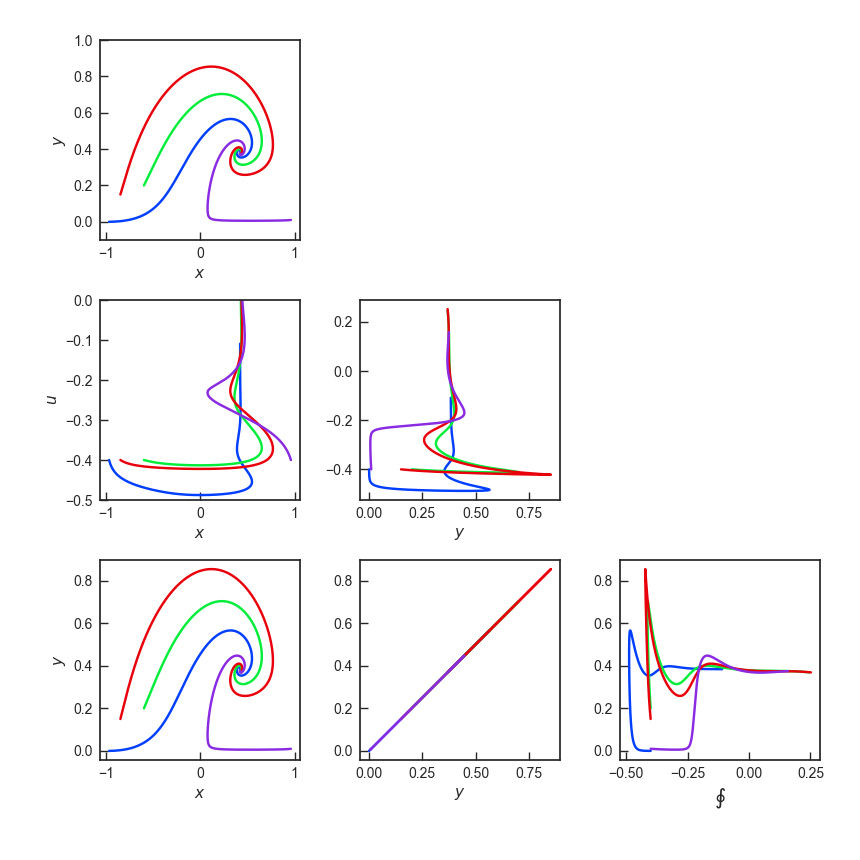

In [12]:
vars_to_plot = ['x', 'y', 'z', 'y']

with sns.axes_style("ticks"):
    fig, axes = plt.subplots(M, M, figsize=(dim, dim), sharex=False, sharey=False)
    # Format the figure.
    lb = lbdim / dim
    tr = (lbdim + plotdim) / dim
    # Call the Triangle Plotter defined in Pyncare
    dynsys.triangle(fig=fig, vars_to_plot=vars_to_plot)
    fig.subplots_adjust(left=lb, bottom=lb, right=tr, top=tr,
                        wspace=wspace, hspace=hspace)
    axes[2,2].set_xlabel(r'$\oint$')
    axes[0,0].set_ylim(-0.1, 1.0)
    axes[1,0].set_ylim(-0.5, 0.0)


